<a href="https://colab.research.google.com/github/lazarod2311/Separation-of-EMG-and-ECG-using-ICA-filter-with-reference/blob/main/Notebooks/ICA_Filter_EMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Automatically created module for IPython interactive environment


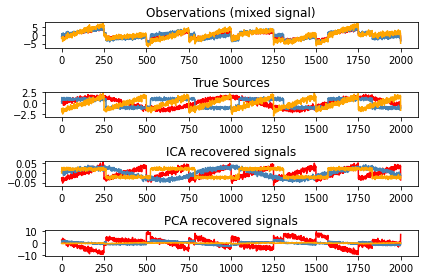

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3,tol = 0.03E-15)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals', 
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']
S_[:,:1]=-S_[:,:1]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
x = 0.02e-2

In [ ]:
x

0.0002

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/ArquivosProji

EMGsemRuido.txt  EMGsemRuido.xlsx  ICAcomReferencia.csv  ICAcomReferencia.xlsx


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ArquivosProji/ICAcomReferencia.xlsx')

In [ ]:
df

,Tempo,EMGr,ECGr
0,0.00025,1.542048,1.575348
1,0.00050,1.539014,1.574014
2,0.00075,1.536810,1.571810
3,0.00100,1.538761,1.568761
4,0.00125,1.534906,1.564906
...,...,...,...
50855,12.71400,0.275437,0.270437
50856,12.71420,0.278370,0.271670
50857,12.71450,0.277902,0.272902
50858,12.71480,0.279132,0.274132


In [ ]:
t = df.Tempo.tolist()

In [ ]:
t

[0.00025,
 0.0005,
 0.00075,
 0.001,
 0.00125,
 0.0015,
 0.00175,
 0.002,
 0.00225,
 0.0025,
 0.00275,
 0.003,
 0.00325,
 0.0035,
 0.00375,
 0.004,
 0.00425,
 0.0045,
 0.00475,
 0.005,
 0.00525,
 0.0055,
 0.00575,
 0.006,
 0.00625,
 0.0065,
 0.00675,
 0.007,
 0.00725,
 0.0075,
 0.00775,
 0.008,
 0.00825,
 0.0085,
 0.00875,
 0.009,
 0.00925,
 0.0095,
 0.00975,
 0.01,
 0.01025,
 0.0105,
 0.01075,
 0.011,
 0.01125,
 0.0115,
 0.01175,
 0.012,
 0.01225,
 0.0125,
 0.01275,
 0.013,
 0.01325,
 0.0135,
 0.01375,
 0.014,
 0.01425,
 0.0145,
 0.01475,
 0.015,
 0.01525,
 0.0155,
 0.01575,
 0.016,
 0.01625,
 0.0165,
 0.01675,
 0.017,
 0.01725,
 0.0175,
 0.01775,
 0.018,
 0.01825,
 0.0185,
 0.01875,
 0.019,
 0.01925,
 0.0195,
 0.01975,
 0.02,
 0.02025,
 0.0205,
 0.02075,
 0.021,
 0.02125,
 0.0215,
 0.02175,
 0.022,
 0.02225,
 0.0225,
 0.02275,
 0.023,
 0.02325,
 0.0235,
 0.02375,
 0.024,
 0.02425,
 0.0245,
 0.02475,
 0.025,
 0.02525,
 0.0255,
 0.02575,
 0.026,
 0.02625,
 0.0265,
 0.02675,
 0.027,
 0.

In [ ]:
emg = df.EMGr.tolist()

In [ ]:
ecg = df.ECGr.tolist()

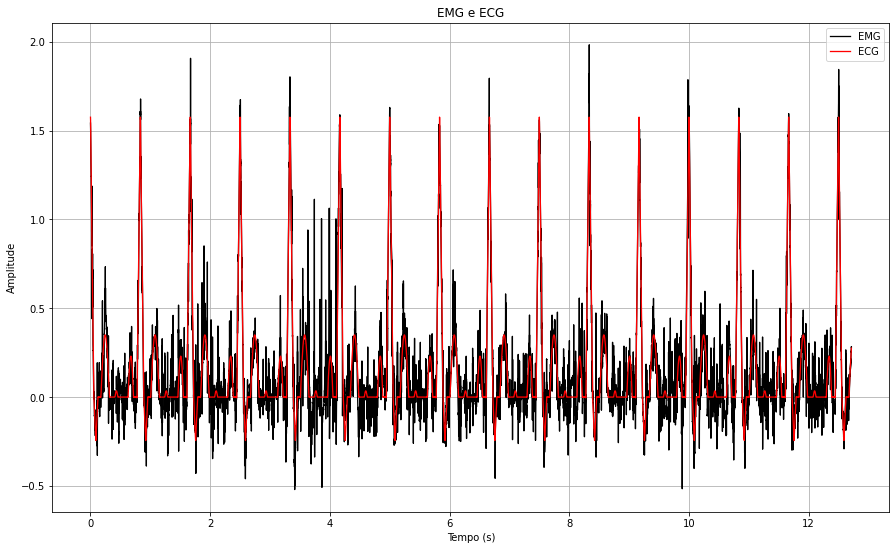

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.plot(t, emg,'k',label=r'EMG',linewidth=1.3)
plt.plot(t, ecg,'r',label=r'ECG',linewidth=1.3)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('EMG e ECG')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
from scipy import signal as sg
from sklearn.decomposition import FastICA

In [ ]:
S = np.c_[ecg,emg]

In [ ]:
S

array([[1.5753475 , 1.5420475 ],
       [1.57401425, 1.53901424],
       [1.57180985, 1.53680985],
       ...,
       [0.27290216, 0.27790216],
       [0.27413228, 0.27913228],
       [0.27535947, 0.28365947]])

In [ ]:
ica = FastICA(n_components=2, tol=0.12e-15, max_iter=500000000)
X = ica.fit_transform(S)

In [ ]:
X[:,1]=X[:,1]*fe

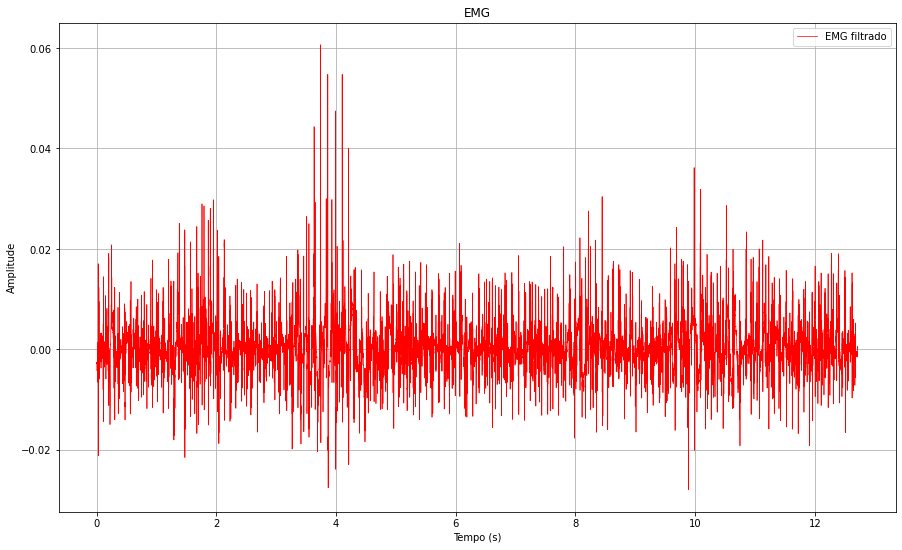

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(t, X[:,1],'r',label=r'EMG filtrado',linewidth=0.7)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('EMG')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/ArquivosProji/EMGsemRuido.xlsx')

In [ ]:
df2

,Tempo,EMGo
0,0.00025,-0.0333
1,0.00050,-0.0350
2,0.00075,-0.0350
3,0.00100,-0.0300
4,0.00125,-0.0300
...,...,...
50855,12.71400,0.0050
50856,12.71420,0.0067
50857,12.71450,0.0050
50858,12.71480,0.0050


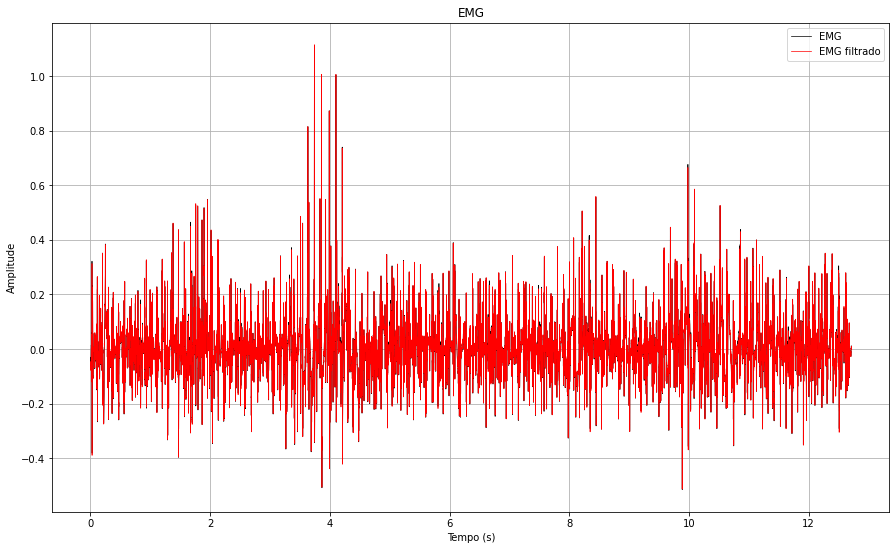

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(df2['Tempo'], df2['EMGo'],'k',label=r'EMG',linewidth=0.7)
plt.plot(t, X[:,1],'r',label=r'EMG filtrado',linewidth=0.7)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('EMG')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
df2.EMGo = df2.EMGo - np.mean(df2.EMGo)

In [ ]:
X[:,1] = X[:,1] - np.mean(X[:,1])

In [ ]:
fe = (max(df2['EMGo'])-min(df2['EMGo']))/(max(X[:,1])-min(X[:,1]))

In [ ]:
X[:,1] = X[:,1]*fe

In [ ]:
adj = max(df2['EMGo'])-max(X[:,1])

In [ ]:
adj

-0.0018004351156353238

In [ ]:
X*fe

array([[-0.77099052,  0.10907609],
       [-0.77024851,  0.11272843],
       [-0.76905415,  0.11267202],
       ...,
       [-0.06575592, -0.00730622],
       [-0.06642241, -0.00727474],
       [-0.06712543, -0.01439941]])

In [ ]:
sem = np.mean(df2['EMGo']/X[:,1])

In [ ]:
sem

1.089439719898238

In [ ]:
sem = 1/sem

In [ ]:
sem

0.9179030117365352

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
trace1 = {
    'x': df.Tempo,
    'y': df2.EMGo,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'black'
    },
    'name': 'EMG ref'
}
trace2 = {
    'x': df.Tempo,
    'y': X[:,1],
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'EMG filtrado'
}
data = [trace1,trace2]
layout = go.Layout ({
    'title': {
        'text': 'EMG',
        'font': {
            'size': 20
        }
    }
})
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
emgf = X[:,1]
emgf = emgf.tolist()


[-0.0502283320301134,
 -0.05191019567317857,
 -0.05188422008289719,
 -0.04685543329061364,
 -0.04681000219064906,
 -0.050050897392945104,
 -0.048390460935151064,
 -0.049917857092685085,
 -0.049840724591410895,
 -0.05315276727602284,
 -0.051366985151948846,
 -0.057964998535125885,
 -0.05786923544272863,
 -0.05437584619749545,
 -0.05767109738355216,
 -0.06256317865233306,
 -0.06246221184225131,
 -0.06735455409289422,
 -0.06885273342048753,
 -0.07374749565691167,
 -0.07365118080021457,
 -0.07854977511481949,
 -0.0784577083542123,
 -0.07507262206339706,
 -0.07828036976468562,
 -0.07489968924551992,
 -0.074816285461329,
 -0.07303706671058187,
 -0.07295690770111314,
 -0.0712802095445435,
 -0.0727997930848853,
 -0.07112445228616794,
 -0.0743422928847696,
 -0.06927182967640605,
 -0.06919378694373661,
 -0.06412217099870747,
 -0.06574006317725664,
 -0.05567354304536309,
 -0.05559151797080064,
 -0.05051531709716675,
 -0.05043064664125388,
 -0.04535180225985305,
 -0.04526458647663511,
 -0.03848580

In [ ]:
def passabanda (fs, finf, fsup, dados, ordem):
  nyquist = 0.5*fs
  low = finf/nyquist
  high = fsup/nyquist
  b, a = sg.butter(ordem,[low,high], btype='band')
  y = sg.lfilter(b,a,dados)
  return y

 

In [ ]:
emgf2 = passabanda(4000,20,500,emgf,6)
emgr2 = passabanda(4000,20,500,df2.EMGo,6)

In [ ]:
ffts = np.fft.fft(emgf2)
fftr = np.fft.fft(emgr2)

In [ ]:
n = float (len(df.Tempo))
dt = max(df.Tempo)/len(df.Tempo)
fs = 1/dt
f = np.linspace(0,(fs/2),int (n/2))

In [ ]:
f

array([0.00000000e+00, 7.86503598e-02, 1.57300720e-01, ...,
       1.99984270e+03, 1.99992135e+03, 2.00000000e+03])

In [ ]:
ffts1 = np.abs(ffts)
fftr1 = np.abs(fftr)

array([-61.70692109, -61.70694386, -61.70709226, ..., -61.70730195,
       -61.70709226, -61.70694386])

In [ ]:
ffts1 = 20*np.log10(ffts1/max(ffts1))
fftr1 = 20*np.log10(fftr1/max(fftr1))

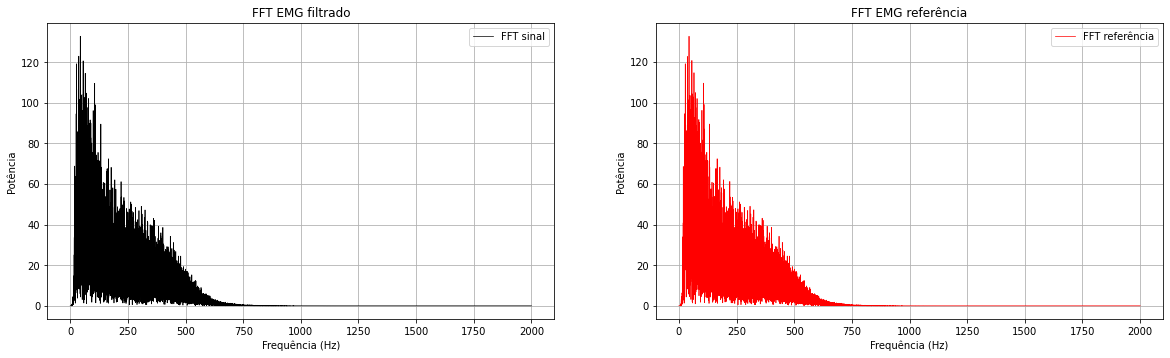

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.plot(f, ffts1[:int (len(ffts1)/2)],'k',label=r'FFT sinal',linewidth=0.7)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Potência')
plt.title('FFT EMG filtrado')
plt.legend(loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.plot(f, fftr1[:int (len(fftr1)/2)],'r',label=r'FFT referência',linewidth=0.7)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Potência')
plt.title('FFT EMG referência')
plt.legend(loc='best')
plt.grid()

plt.show()

In [ ]:
sem = fftr1/ffts1

In [ ]:
np.mean(sem)*100

95.72952348929815

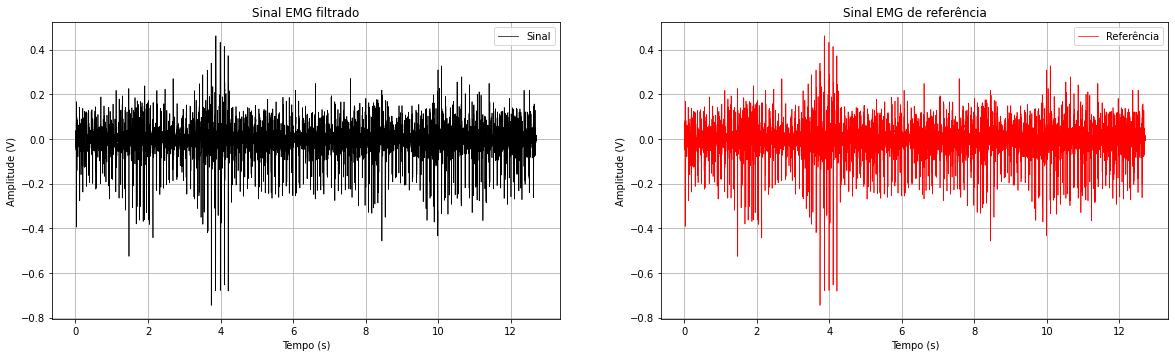

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.plot(t, emgf2,'k',label=r'Sinal',linewidth=0.7)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.title('Sinal EMG filtrado')
plt.legend(loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.plot(t, emgr2,'r',label=r'Referência',linewidth=0.7)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.title('Sinal EMG de referência')
plt.legend(loc='best')
plt.grid()

plt.show()

In [ ]:
def ccf (a,b,lag):
  resultado = sg.correlate(a-np.mean(a),b-np.mean(b),method='direct')/(np.std(a) * np.std(b) * len(a))
  leng = (len(resultado)-1)//2
  lo = leng - lag
  hi = leng + (lag+1)
  return resultado[lo:hi]

correla = ccf(ffts1,fftr1,100)

In [ ]:
sem = max(correla)*100

In [ ]:
sem

99.99914475134506